In [15]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs=zip(lats,lngs)
lat_lngs

In [17]:
# Add the latitude and longitudes to a list. Unpacking lat_lngs zip object into a list.
coordinates = list(lat_lngs)

In [18]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [19]:
# Create a list for holding the cities.
cities =[]

# Identitfy the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

611

In [20]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [21]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=633e9d460d5126c6bfe7a7cefe75af2f


In [22]:
# Import the time library and teh datetime module from the datetime library.
import time
from datetime import datetime

In [23]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval      ")
print("------------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval      
------------------------------


In [25]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 2 | caravelas
Processing Record 2 of Set 2 | tsihombe
City not found. Skipping...
Processing Record 3 of Set 2 | ponta do sol
Processing Record 4 of Set 2 | yellowknife
Processing Record 5 of Set 2 | puerto ayora
Processing Record 6 of Set 2 | avarua
Processing Record 7 of Set 2 | anadyr
Processing Record 8 of Set 2 | zyryanka
Processing Record 9 of Set 2 | victor harbor
Processing Record 10 of Set 2 | hithadhoo
Processing Record 11 of Set 2 | kuopio
Processing Record 12 of Set 2 | upernavik
Processing Record 13 of Set 2 | cape town
Processing Record 14 of Set 2 | saint-philippe
Processing Record 15 of Set 2 | busselton
Processing Record 16 of Set 2 | homer
Processing Record 17 of Set 2 | straubing
Processing Record 18 of Set 2 | bluff
Processing Record 19 of Set 2 | padang
Processing Record 20 of Set 2 | kapaa
Processing Record 21 of Set 2 | tigil
Processing Record 22 of Set 2 | bethel
Processing Record 23 of Set 2 | barrow
Processing Record 24 of Set 2 | to

Processing Record 35 of Set 5 | lagoa santa
Processing Record 36 of Set 5 | lyaskelya
Processing Record 37 of Set 5 | noumea
Processing Record 38 of Set 5 | mount isa
Processing Record 39 of Set 5 | kununurra
Processing Record 40 of Set 5 | porto novo
Processing Record 41 of Set 5 | luderitz
Processing Record 42 of Set 5 | guarapari
Processing Record 43 of Set 5 | san cristobal
Processing Record 44 of Set 5 | melilla
Processing Record 45 of Set 5 | olafsvik
Processing Record 46 of Set 5 | turayf
Processing Record 47 of Set 5 | ajuchitlan
Processing Record 48 of Set 5 | berbera
Processing Record 49 of Set 5 | fairbanks
Processing Record 50 of Set 5 | lata
Processing Record 1 of Set 6 | attawapiskat
City not found. Skipping...
Processing Record 2 of Set 6 | hamilton
Processing Record 3 of Set 6 | saskylakh
Processing Record 4 of Set 6 | tasiilaq
Processing Record 5 of Set 6 | batamshinskiy
Processing Record 6 of Set 6 | nosy varika
Processing Record 7 of Set 6 | fort nelson
Processing Re

Processing Record 25 of Set 9 | port hedland
Processing Record 26 of Set 9 | hami
Processing Record 27 of Set 9 | key west
Processing Record 28 of Set 9 | yarada
Processing Record 29 of Set 9 | maniitsoq
Processing Record 30 of Set 9 | lorengau
Processing Record 31 of Set 9 | zhigansk
Processing Record 32 of Set 9 | sena madureira
Processing Record 33 of Set 9 | vostok
Processing Record 34 of Set 9 | wanlaweyn
Processing Record 35 of Set 9 | salalah
Processing Record 36 of Set 9 | mahina
Processing Record 37 of Set 9 | akyab
Processing Record 38 of Set 9 | goderich
Processing Record 39 of Set 9 | caranavi
Processing Record 40 of Set 9 | chuy
Processing Record 41 of Set 9 | miquelon
Processing Record 42 of Set 9 | houma
Processing Record 43 of Set 9 | buraydah
Processing Record 44 of Set 9 | chebarkul
Processing Record 45 of Set 9 | naze
Processing Record 46 of Set 9 | maarianhamina
Processing Record 47 of Set 9 | lake city
Processing Record 48 of Set 9 | asau
Processing Record 49 of Se

Processing Record 17 of Set 13 | kapoeta
Processing Record 18 of Set 13 | yuryuzan
Processing Record 19 of Set 13 | batticaloa
Processing Record 20 of Set 13 | ratnagiri
Processing Record 21 of Set 13 | suhbaatar
Processing Record 22 of Set 13 | barra patuca
Processing Record 23 of Set 13 | plouzane
Processing Record 24 of Set 13 | touros
Processing Record 25 of Set 13 | bonavista
Processing Record 26 of Set 13 | chabahar
Processing Record 27 of Set 13 | marcona
City not found. Skipping...
Processing Record 28 of Set 13 | bandarban
Processing Record 29 of Set 13 | feni
Processing Record 30 of Set 13 | shiyan
Processing Record 31 of Set 13 | taoudenni
Processing Record 32 of Set 13 | liwonde
Processing Record 33 of Set 13 | zachagansk
City not found. Skipping...
Processing Record 34 of Set 13 | hualmay
Processing Record 35 of Set 13 | nurota
Processing Record 36 of Set 13 | ocos
Processing Record 37 of Set 13 | pisco
Processing Record 38 of Set 13 | najran
Processing Record 39 of Set 13

In [27]:
len(city_data)

615

In [28]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Caravelas,-17.7125,-39.2481,69.80,89,0,3.67,BR,2022-07-09 00:38:36
1,Ponta Do Sol,32.6667,-17.1000,69.12,60,4,2.13,PT,2022-07-09 00:38:36
2,Yellowknife,62.4560,-114.3525,79.32,36,75,16.11,CA,2022-07-09 00:37:52
3,Puerto Ayora,-0.7393,-90.3518,71.55,90,29,5.01,EC,2022-07-09 00:38:36
4,Avarua,-21.2078,-159.7750,77.05,57,40,14.97,CK,2022-07-09 00:38:37
5,Anadyr,64.7500,177.4833,50.50,81,40,20.13,RU,2022-07-09 00:38:37
6,Zyryanka,65.7500,150.8500,48.54,92,100,21.21,RU,2022-07-09 00:38:37
7,Victor Harbor,-35.5667,138.6167,54.00,69,100,1.01,AU,2022-07-09 00:38:38
8,Hithadhoo,-0.6000,73.0833,80.46,80,100,5.10,MV,2022-07-09 00:38:38
9,Kuopio,62.8924,27.6770,58.95,77,75,4.61,FI,2022-07-09 00:38:37


In [34]:
# Reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Caravelas,BR,2022-07-09 00:38:36,-17.7125,-39.2481,69.80,89,0,3.67
1,Ponta Do Sol,PT,2022-07-09 00:38:36,32.6667,-17.1000,69.12,60,4,2.13
2,Yellowknife,CA,2022-07-09 00:37:52,62.4560,-114.3525,79.32,36,75,16.11
3,Puerto Ayora,EC,2022-07-09 00:38:36,-0.7393,-90.3518,71.55,90,29,5.01
4,Avarua,CK,2022-07-09 00:38:37,-21.2078,-159.7750,77.05,57,40,14.97
5,Anadyr,RU,2022-07-09 00:38:37,64.7500,177.4833,50.50,81,40,20.13
6,Zyryanka,RU,2022-07-09 00:38:37,65.7500,150.8500,48.54,92,100,21.21
7,Victor Harbor,AU,2022-07-09 00:38:38,-35.5667,138.6167,54.00,69,100,1.01
8,Hithadhoo,MV,2022-07-09 00:38:38,-0.6000,73.0833,80.46,80,100,5.10
9,Kuopio,FI,2022-07-09 00:38:37,62.8924,27.6770,58.95,77,75,4.61


In [35]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [38]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

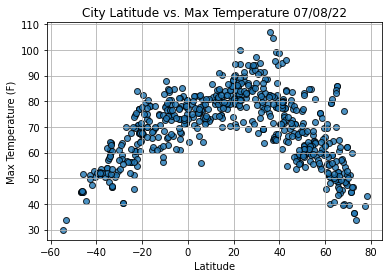

In [39]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

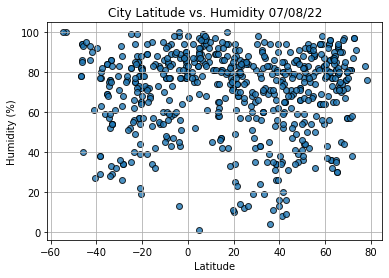

In [40]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

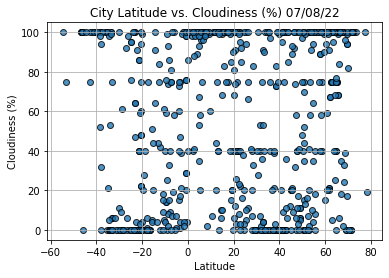

In [42]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

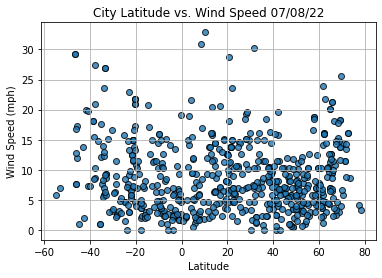

In [43]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [44]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

     # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [45]:
index13 = city_data_df.loc[13]
index13

City                    Busselton
Country                        AU
Date          2022-07-09 00:38:39
Lat                        -33.65
Lng                      115.3333
Max Temp                    63.88
Humidity                       86
Cloudiness                    100
Wind Speed                  26.84
Name: 13, dtype: object

In [46]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4      False
       ...  
610     True
611    False
612    False
613    False
614     True
Name: Lat, Length: 615, dtype: bool

In [48]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Ponta Do Sol,PT,2022-07-09 00:38:36,32.6667,-17.1000,69.12,60,4,2.13
2,Yellowknife,CA,2022-07-09 00:37:52,62.4560,-114.3525,79.32,36,75,16.11
5,Anadyr,RU,2022-07-09 00:38:37,64.7500,177.4833,50.50,81,40,20.13
6,Zyryanka,RU,2022-07-09 00:38:37,65.7500,150.8500,48.54,92,100,21.21
9,Kuopio,FI,2022-07-09 00:38:37,62.8924,27.6770,58.95,77,75,4.61


In [49]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

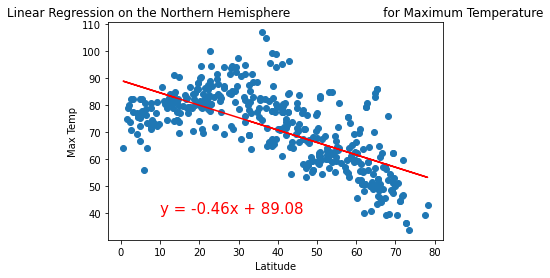

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for Maximum Temperature', 'Max Temp', (10,40))

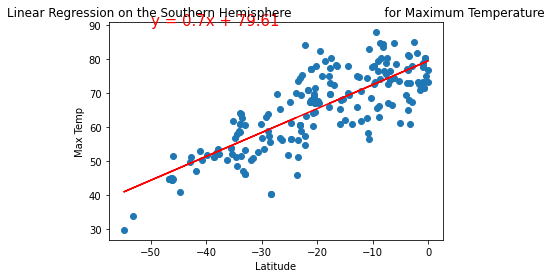

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for Maximum Temperature', 'Max Temp', (-50,90))

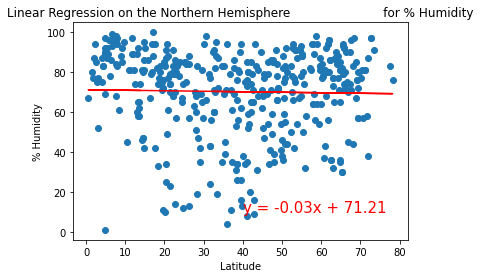

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for % Humidity', '% Humidity', (40, 10))

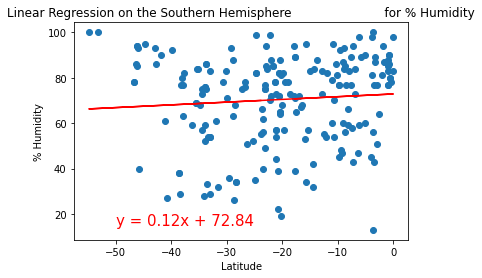

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for % Humidity', '% Humidity', (-50, 15))

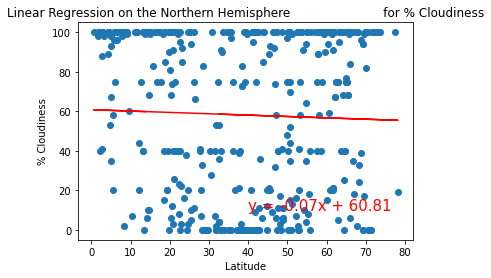

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for % Cloudiness', '% Cloudiness', (40, 10))

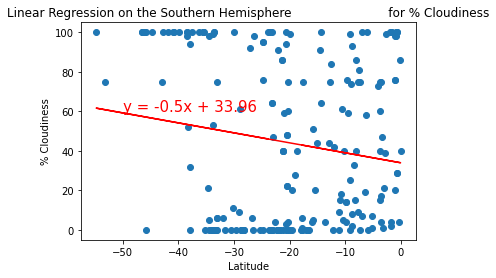

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

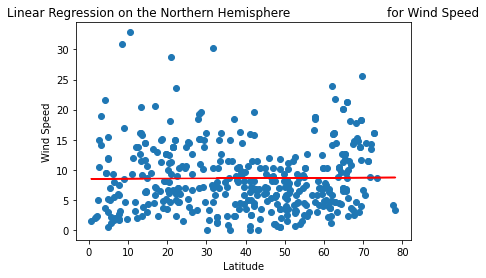

In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

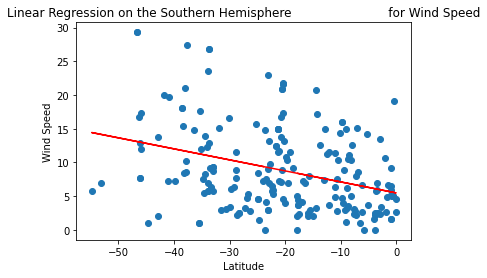

In [70]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))